# Machine Learning - Regression
Problem
***A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.***


They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. The
company wants to know:
● Which variables are significant in predicting the price of a car.
● How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.

**Attributes**
1. Car_ID - Unique ID for each observation.
2. Symboling - Its assigned insurance risk rating, value +3 indicates that the auto is risky,
-3 that it is pretty safe.
3. carCompany - Name of company
4. fueltype - Car fuel type.
5. aspiration - Aspiration used in car
6. doornumber - Number of doors in a car
7. carbody - body of car
8. drivewheel - type of drive wheel
9. enginelocation - location of car engine
10. wheelbase - Wheelbase of car
11. carlength - length of car
12. carwidth - width of car
13. carheight - height of car
14. curbweight - The weight of a car without occupants or luggage.
15. enginetype - type of engine
16. cylindernumber - cylinder placed in the car.
17. enginesize - size of car.
18. fuelsystem - Fuel system of car.
19. boreratio - Boreratio of car
20. stroke - Stroke or volume inside the engine.
21. compressionratio - compression ratio of car.
22. horsepower - Horsepower
23. peakrpm - car peak rpm
24. citympg - Mileage in city
25. highwaympg - Mileage on highway
26. Price( Dependent Variable) - Price of car

**Objective**
You are required to model the prices of cars with the available independent variables. It will be
used by management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet
certain price levels. Further, the model will be good for management to understand the pricing
dynamics of the new market.


Questions -

Step 1 : Understand the Business Problem.

Step 2 : Import all the libraries and set up all the requirements that you will need.

Step 3: Import the data set and check the following
- dimension of the dataset.
- data types.
- Missing value available in the dataset.
- Descriptive statistics of data and write the observation.
  
Step 4: Data Cleaning
- Create the column as 'CompanyName' using 'CarName' Column. List down the unique
'CompanyName'.
- Check the correctness of data in the 'CompanyName' column.
- Check the duplicate data in the dataset.
  
Step 5: Exploratory Data Analysis
- Visualize the 'price' column using displot and boxplot. Write down the observations.
- Perform the appropriate transformation to make the target as a gaussian distribution.
- Check the linear relationship between the dependent variable "Price" and the numerical
independent variables
- Checking the multicollinearity between the correlated independent variables above and
Price
- Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the
Target variables.
- Perform feature engineering based on sound knowledge of the business problem and
available dataset.

Step 6: Perform the preprocessing that is required for the model.

Step 7: Split the dataset into train and test data sets and perform the scaling on both
sets if necessary.

Step 8: Build the base model.

Step 9: Understand how the model is performing, Perform feature engineering again if
needed. Do feature selection. Try with various models like parametric and
nonparametric models. Once you choose the final model, rebuild the model with the
best parameters.

Note: If you are performing with Linear models, check the model is fulfilling the
assumptions.

Step 10: Based on your understanding of the model and EDA analysis, Explain the
business understanding.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
data = pd.read_csv('car_prices.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df = data.copy()


Step 3: Import the data set and check the following

dimension of the dataset.
data types.
Missing value available in the dataset.
Descriptive statistics of data and write the observation.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
print('Rows:',df.shape[0])
print('Cols:',df.shape[1])

Rows: 205
Cols: 26


In [6]:
df[df.duplicated()] # No duplicates

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
df[df.drop_duplicates(inplace=True)]

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# No missing values

In [9]:
# DROPPING CAR ID

In [10]:
df.drop('car_ID',axis = 1, inplace = True)

In [11]:
# STATS SUMMARY
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


* Many columns are seems to be skewed and many independent variables are related to each other(multicollinearity). 
* Price (TARGET) column is also right skewed indicating outliers in the target variable

In [12]:
# DATA CLEANING

In [13]:
df['CompanyName']= df['CarName'].str.split(expand = True)[0]

In [14]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
df['CompanyName'] = df['CompanyName'].replace({'alfa-romero':'alfa-romeo', 
                           'maxda': 'mazda',
                           'Nissan': 'nissan',
                           'porcshce':'porsche',
                           'toyouta':'toyota',
                           'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [16]:
df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [110]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName'],
      dtype='object')

In [111]:
for i in df.columns:
    print(i)
    print(df[i].unique())

symboling
[ 3  1  2  0 -1 -2]
fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
[0 2 3 4 1]
drivewheel
[2 1 0]
enginelocation
['front' 'rear']
wheelbase
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
carlength
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]
carwidth
[64.1 65.

Step 5: Exploratory Data Analysis

- Visualize the 'price' column using displot and boxplot. Write down the observations.
- Perform the appropriate transformation to make the target as a gaussian distribution.
- Check the linear relationship between the dependent variable "Price" and the numerical
independent variables
- Checking the multicollinearity between the correlated independent variables above and
Price

In [17]:
# Target analysis

In [18]:
print('Skewness:',df['price'].skew(), 'Kurtosis:',df['price'].kurt())

Skewness: 1.7776781560914454 Kurtosis: 3.051647871396399


In [118]:
plt.rcParams['figure.figsize'] = [20,10]

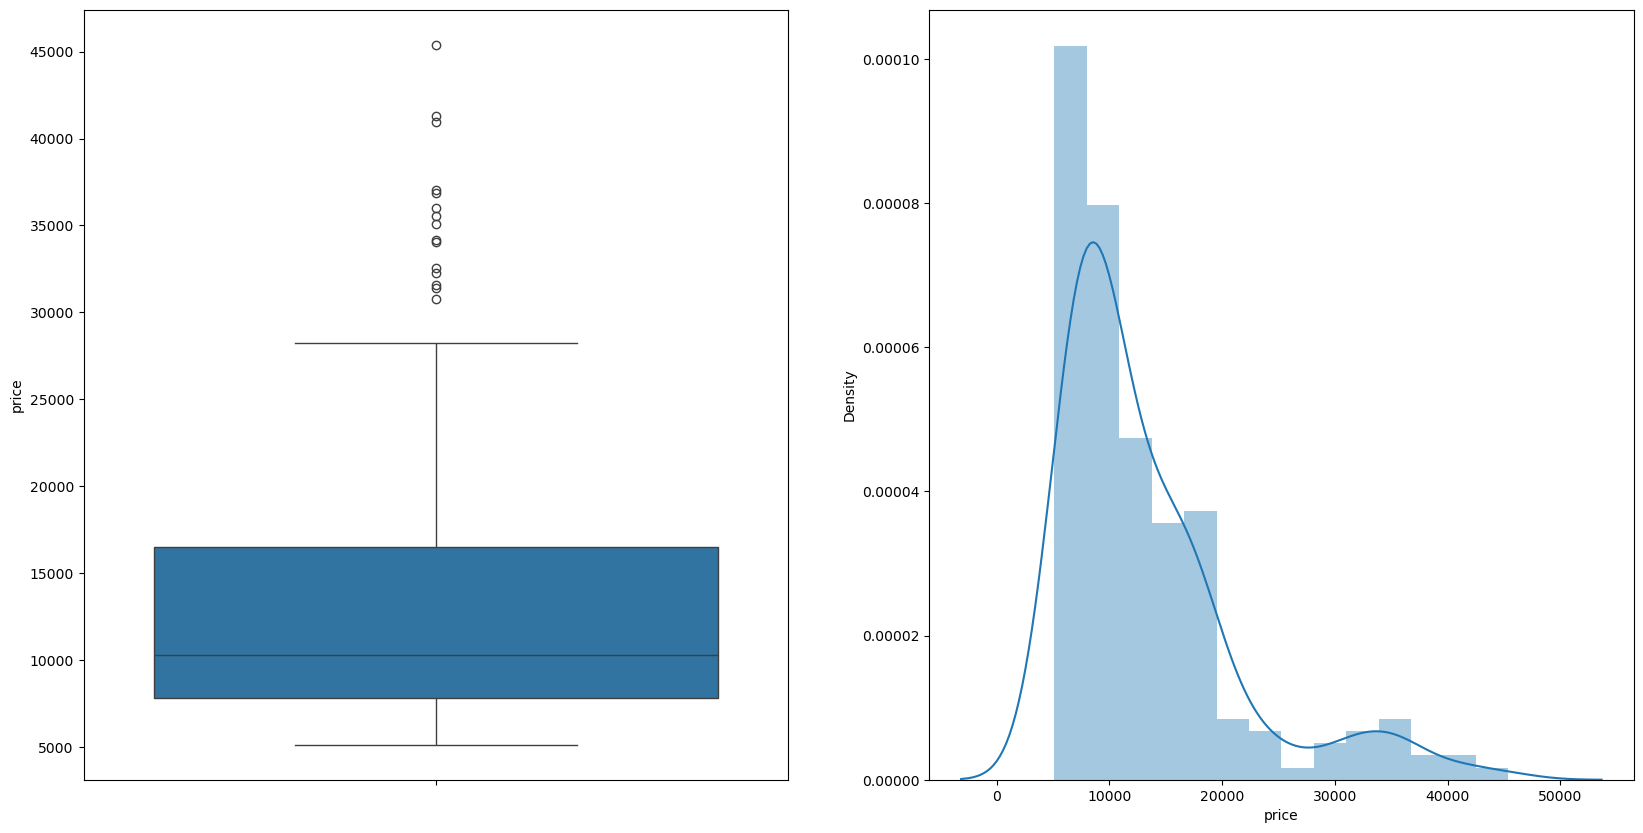

In [117]:
plt.subplot(1,2,1)
sns.boxplot(df['price'])

plt.subplot(1,2,2)
sns.distplot(df['price'])
plt.show()

In [122]:
# finding Outliers :

q3 = df['price'].quantile(0.75)
q1 = df['price'].quantile(0.25)
iqr = q3 - q1

upperwhis = q3 + 1.5 * iqr
lowerwhis = q1 - 1.5 * iqr

outliers = df[(df['price'] < lowerwhis) | (df['price'] > upperwhis)]
df['price'].skew()
outliers

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
15,0,gas,std,four,3,2,front,103.5,189.0,66.9,...,5,3.62,3.39,8.0,182,5400,16,22,30760.0,2
16,0,gas,std,two,3,2,front,103.5,193.8,67.9,...,5,3.62,3.39,8.0,182,5400,16,22,41315.0,2
17,0,gas,std,four,3,2,front,110.0,197.0,70.9,...,5,3.62,3.39,8.0,182,5400,15,20,36880.0,2
47,0,gas,std,four,3,2,front,113.0,199.6,69.6,...,5,3.63,4.17,8.1,176,4750,15,19,32250.0,8
48,0,gas,std,four,3,2,front,113.0,199.6,69.6,...,5,3.63,4.17,8.1,176,4750,15,19,35550.0,8
49,0,gas,std,two,3,2,front,102.0,191.7,70.6,...,5,3.54,2.76,11.5,262,5000,13,17,36000.0,8
70,-1,diesel,turbo,four,3,2,front,115.6,202.6,71.7,...,3,3.58,3.64,21.5,123,4350,22,25,31600.0,3
71,-1,gas,std,four,3,2,front,115.6,202.6,71.7,...,5,3.46,3.10,8.3,155,4750,16,18,34184.0,3
72,3,gas,std,two,0,2,front,96.6,180.3,70.5,...,5,3.46,3.10,8.3,155,4750,16,18,35056.0,3
73,0,gas,std,four,3,2,front,120.9,208.1,71.7,...,5,3.80,3.35,8.0,184,4500,14,16,40960.0,3


In [123]:
df.shape

(205, 25)

Price column is highly right skewed, indicating some datapoints are far away from the majority of the data. The extreme values indicates some car with specified features have more price. We need to give this pattern to the model

In [21]:
num = df.select_dtypes(include='number').columns.to_list()

In [22]:
for i in num:
    if i != 'price':
        print(f'Corr between {i} vs price: {df[i].corr(df['price'])}')

Corr between symboling vs price: -0.07997822464270347
Corr between wheelbase vs price: 0.5778155982921496
Corr between carlength vs price: 0.6829200156779629
Corr between carwidth vs price: 0.7593252997415118
Corr between carheight vs price: 0.11933622657049436
Corr between curbweight vs price: 0.8353048793372965
Corr between enginesize vs price: 0.8741448025245112
Corr between boreratio vs price: 0.5531732367984434
Corr between stroke vs price: 0.079443083881931
Corr between compressionratio vs price: 0.06798350579944265
Corr between horsepower vs price: 0.8081388225362212
Corr between peakrpm vs price: -0.08526715027785685
Corr between citympg vs price: -0.6857513360270401
Corr between highwaympg vs price: -0.6975990916465566


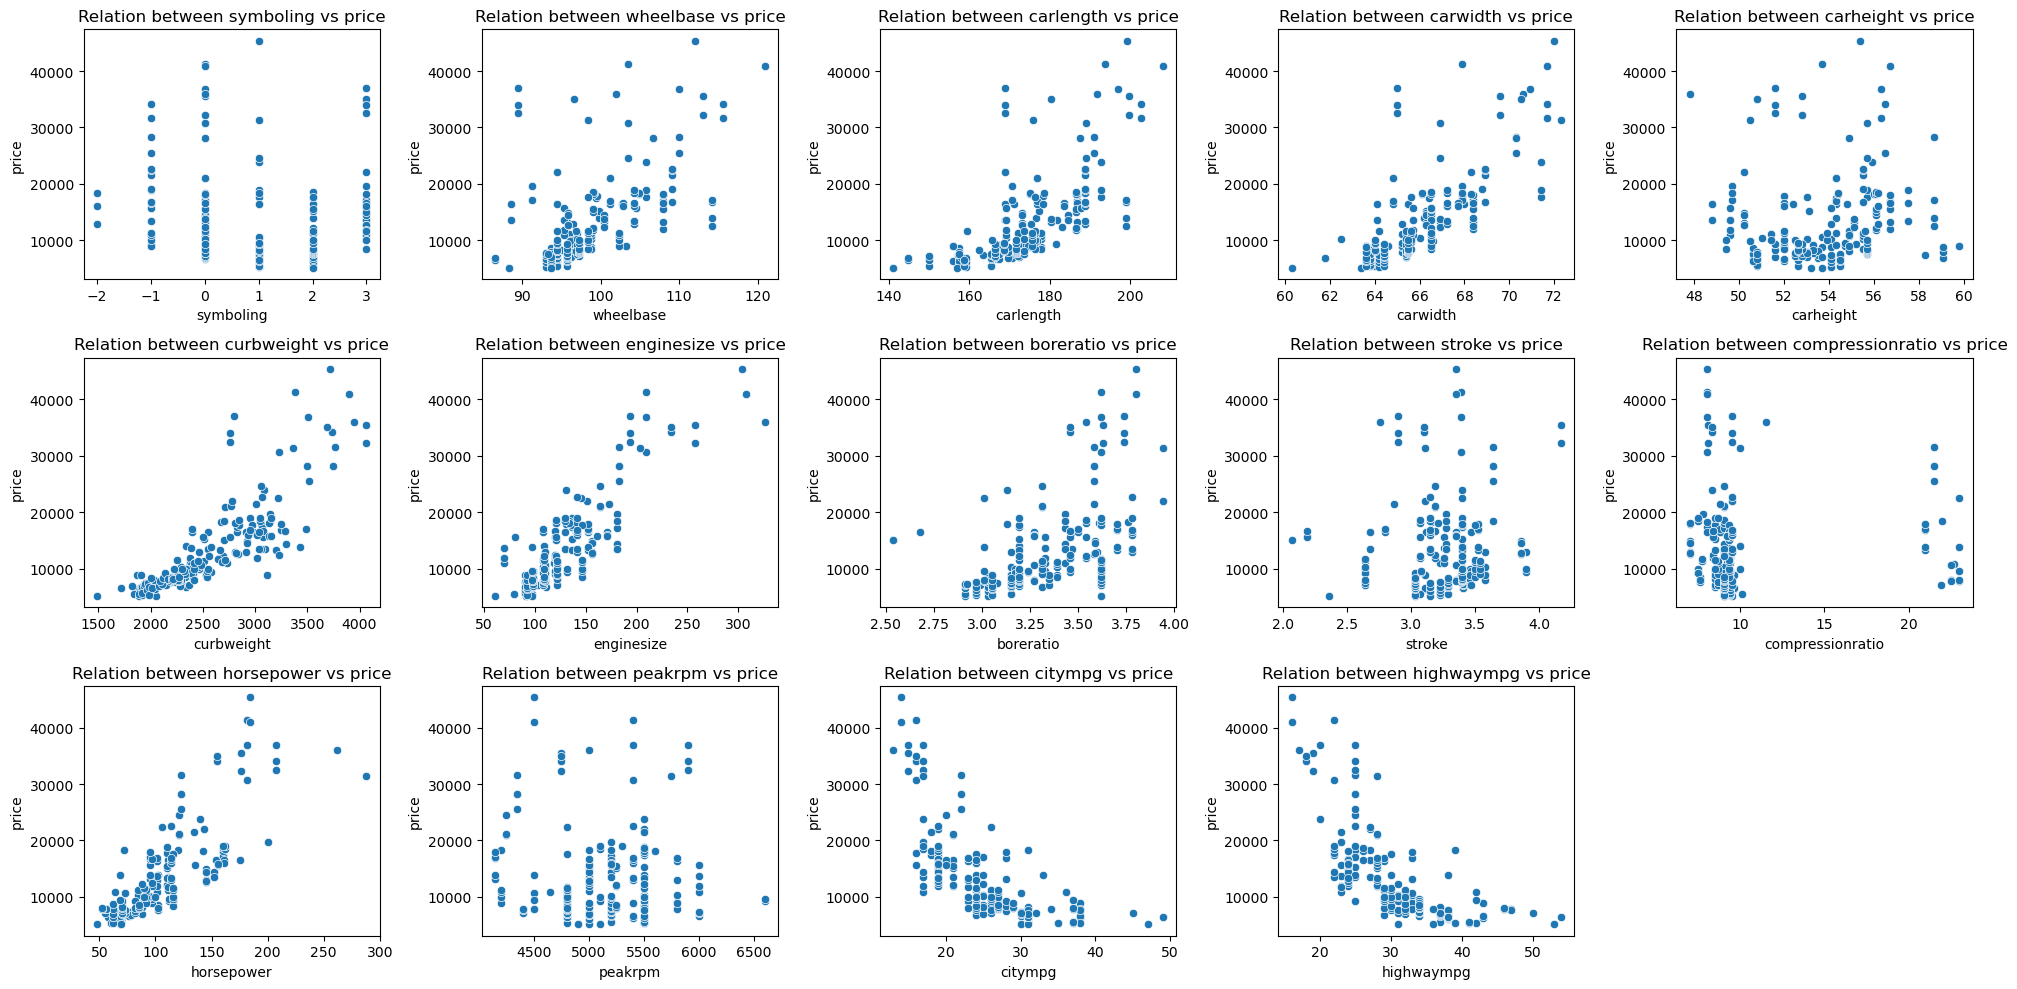

In [23]:
t = 1
for i in num:
    if i != 'price':
        plt.subplot(3,5,t)
        sns.scatterplot(x=df[i], y= df['price'])
        plt.title(f'Relation between {i} vs price')
        t+=1
plt.tight_layout()
plt.show()

Columns symboling, peakrpm, carheight, compressionratio have no relation with price, indicates those are not significant in predicting price.


* Checking the multicollinearity between the correlated independent variables above and Price

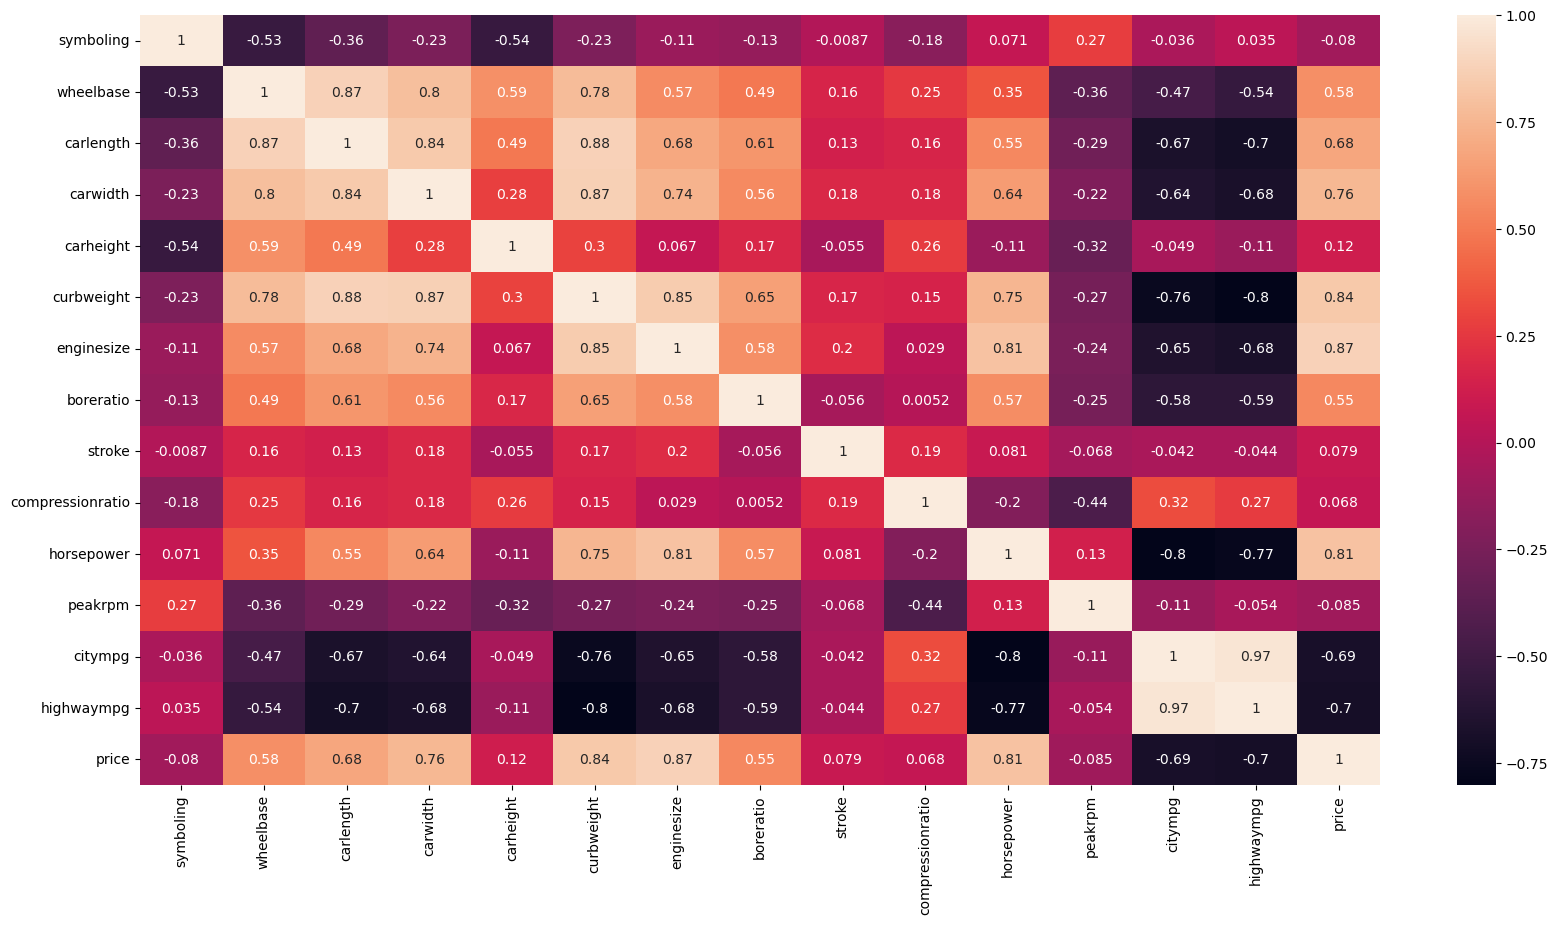

In [24]:
sns.heatmap(df[num].corr(), annot=True)
plt.show()

Many independent columns are highly related to each other. We can use VIF to remove multicollinearity during model building

- Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the
Target variables.
- Perform feature engineering based on sound knowledge of the business problem and
available dataset.


In [25]:
# Univarite analysis:

In [26]:
# Ignoring carname for the furthur analysis

In [27]:
df.drop('CarName',axis = 1, inplace = True)

In [28]:
# Numeric data:
for i in num:
    if  df[i].skew() > 0:
        print(f'{i} is positively skewed with value {df[i].skew()}')
    elif  df[i].skew() < 0:
        print(f'{i} is negatively skewed with value {df[i].skew()}')
    else:
        print(f'{i} is not much skewed with value {df[i].skew()}')

symboling is positively skewed with value 0.21107227205788776
wheelbase is positively skewed with value 1.0502137758714858
carlength is positively skewed with value 0.1559537713215604
carwidth is positively skewed with value 0.904003498786254
carheight is positively skewed with value 0.06312273247192804
curbweight is positively skewed with value 0.681398189052588
enginesize is positively skewed with value 1.9476550452788108
boreratio is positively skewed with value 0.02015641810424137
stroke is negatively skewed with value -0.6897045784233837
compressionratio is positively skewed with value 2.6108624576151533
horsepower is positively skewed with value 1.4053101543373119
peakrpm is positively skewed with value 0.07515872237118956
citympg is positively skewed with value 0.6637040288148164
highwaympg is positively skewed with value 0.5399971878746754
price is positively skewed with value 1.7776781560914454


In [29]:
# Numeric data:
for i in num:
    if  df[i].kurt() > 0:
        print(f'{i} is leptokurtic with value {df[i].kurt()}')
    elif  df[i].kurt() < 0:
        print(f'{i} is platykurtic with value {df[i].kurt()}')
    else:
        print(f'{i} is mesikurtic with value {df[i].kurt()}')

symboling is platykurtic with value -0.6762713561903944
wheelbase is leptokurtic with value 1.0170389463774234
carlength is platykurtic with value -0.08289485344758996
carwidth is leptokurtic with value 0.7027642441369477
carheight is platykurtic with value -0.4438123650575503
curbweight is platykurtic with value -0.04285376609990976
enginesize is leptokurtic with value 5.305682091703767
boreratio is platykurtic with value -0.7850418331859514
stroke is leptokurtic with value 2.174396435292872
compressionratio is leptokurtic with value 5.233054347604856
horsepower is leptokurtic with value 2.684006159633522
peakrpm is leptokurtic with value 0.08675585561274479
citympg is leptokurtic with value 0.5786483404849747
highwaympg is leptokurtic with value 0.44007038152989786
price is leptokurtic with value 3.051647871396399


In [30]:
# Visulaization

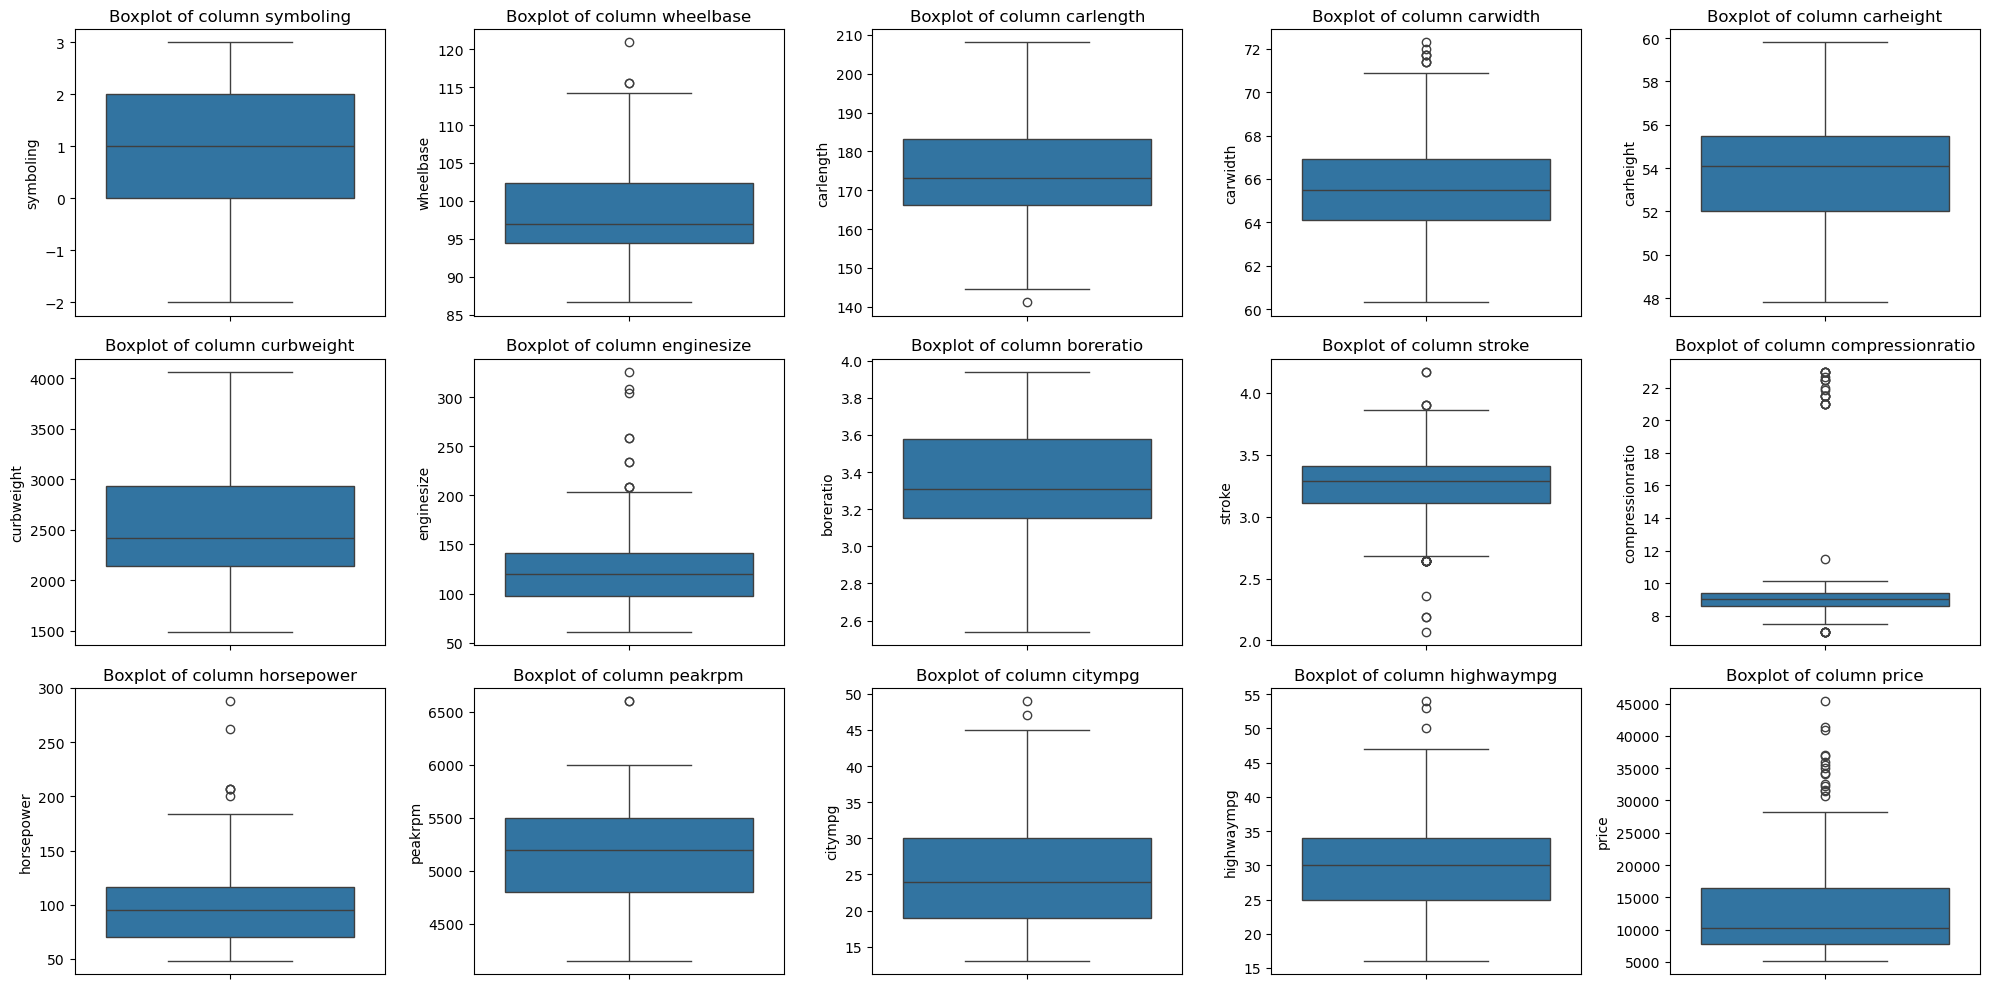

In [31]:
t = 1
for i in num:
    plt.subplot(3,5,t)
    sns.boxplot(df[i])
    plt.title(f'Boxplot of column {i}')
    t+=1
plt.tight_layout()
plt.show()


Many columns have evident outliers inidcates data points are far away form majority.

In [32]:
# Categoric 
cat = df.select_dtypes(include=object).columns.to_list()

In [33]:
for i in cat:
    print(df[i].value_counts(normalize=True)*100)

fueltype
gas       90.243902
diesel     9.756098
Name: proportion, dtype: float64
aspiration
std      81.95122
turbo    18.04878
Name: proportion, dtype: float64
doornumber
four    56.097561
two     43.902439
Name: proportion, dtype: float64
carbody
sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: proportion, dtype: float64
drivewheel
fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: proportion, dtype: float64
enginelocation
front    98.536585
rear      1.463415
Name: proportion, dtype: float64
enginetype
ohc      72.195122
ohcf      7.317073
ohcv      6.341463
dohc      5.853659
l         5.853659
rotor     1.951220
dohcv     0.487805
Name: proportion, dtype: float64
cylindernumber
four      77.560976
six       11.707317
five       5.365854
eight      2.439024
two        1.951220
twelve     0.487805
three      0.487805
Name: proportion, dtype: float64
fuelsystem
mpfi    45.853659
2bbl    32.195122

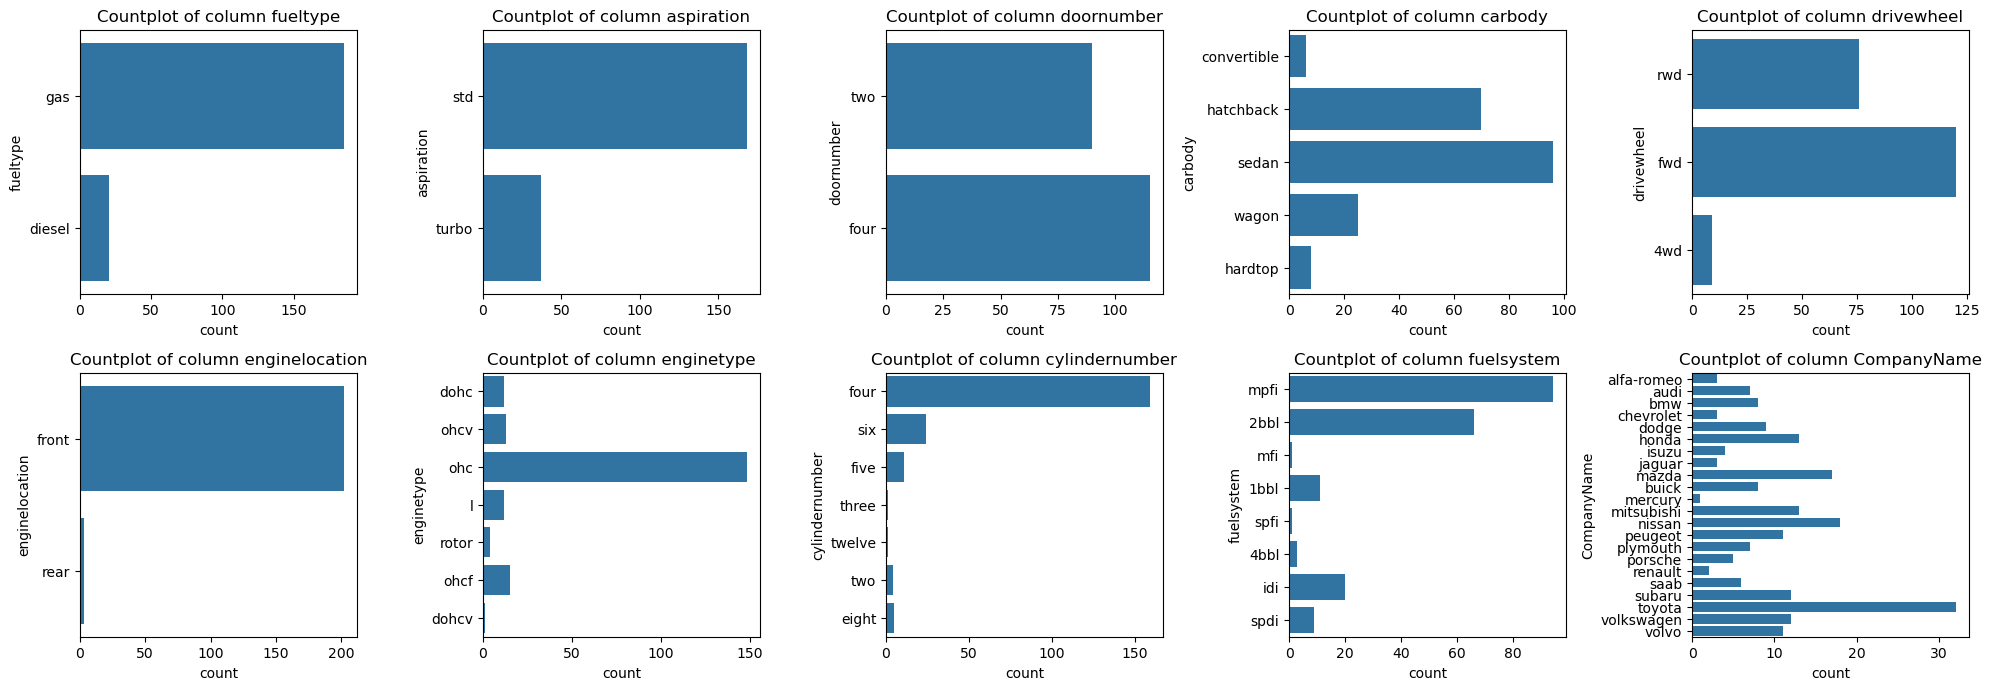

In [34]:
t = 1
for i in cat:
    plt.subplot(3,5,t)
    sns.countplot(y=df[i])
    plt.title(f'Countplot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

In [35]:
# bivaritae and multivariate analysis

* Perform the preprocessing that is required for the model.

In [36]:
for i in cat:
    print(i)
    print(df[i].unique())
    print()

fueltype
['gas' 'diesel']

aspiration
['std' 'turbo']

doornumber
['two' 'four']

carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel
['rwd' 'fwd' '4wd']

enginelocation
['front' 'rear']

enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

CompanyName
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']



In [37]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [38]:
lab_col = ['carbody', 'drivewheel', 'enginetype','fuelsystem',  'CompanyName']

In [39]:
for i in lab_col:
    df[i] = lab.fit_transform(df[[i]])

In [40]:
for i in cat:
    print(i)
    print(df[i].unique())
    print()

fueltype
['gas' 'diesel']

aspiration
['std' 'turbo']

doornumber
['two' 'four']

carbody
[0 2 3 4 1]

drivewheel
[2 1 0]

enginelocation
['front' 'rear']

enginetype
[0 5 3 2 6 4 1]

cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem
[5 1 4 0 7 2 3 6]

CompanyName
[ 0  1  2  4  5  6  7  8  9  3 10 11 12 13 14 15 16 17 18 19 20 21]



In [41]:
one_hot = ['fueltype','aspiration','enginelocation']

In [42]:
dff = pd.get_dummies(data = df, columns=one_hot, dtype =int, drop_first=True)
dff

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueltype_gas,aspiration_turbo,enginelocation_rear
0,3,two,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,13495.0,0,1,0,0
1,3,two,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,16500.0,0,1,0,0
2,1,two,2,2,94.5,171.2,65.5,52.4,2823,5,...,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,four,3,1,99.8,176.6,66.2,54.3,2337,3,...,10.0,102,5500,24,30,13950.0,1,1,0,0
4,2,four,3,0,99.4,176.6,66.4,54.3,2824,3,...,8.0,115,5500,18,22,17450.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,four,3,2,109.1,188.8,68.9,55.5,2952,3,...,9.5,114,5400,23,28,16845.0,21,1,0,0
201,-1,four,3,2,109.1,188.8,68.8,55.5,3049,3,...,8.7,160,5300,19,25,19045.0,21,1,1,0
202,-1,four,3,2,109.1,188.8,68.9,55.5,3012,5,...,8.8,134,5500,18,23,21485.0,21,1,0,0
203,-1,four,3,2,109.1,188.8,68.9,55.5,3217,3,...,23.0,106,4800,26,27,22470.0,21,0,1,0


In [43]:
dff['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [44]:
dff['doornumber'] = dff['doornumber'].replace({'two':2, 'four':4})

In [45]:
dff['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [46]:
dff['cylindernumber'] = dff['cylindernumber'].replace({'four': 4, 'six':6, 'five':5, 'three':3,
                              'twelve':12, 'two':2, 'eight':8})

In [47]:
dff

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueltype_gas,aspiration_turbo,enginelocation_rear
0,3,2,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,13495.0,0,1,0,0
1,3,2,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,16500.0,0,1,0,0
2,1,2,2,2,94.5,171.2,65.5,52.4,2823,5,...,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,4,3,1,99.8,176.6,66.2,54.3,2337,3,...,10.0,102,5500,24,30,13950.0,1,1,0,0
4,2,4,3,0,99.4,176.6,66.4,54.3,2824,3,...,8.0,115,5500,18,22,17450.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,3,2,109.1,188.8,68.9,55.5,2952,3,...,9.5,114,5400,23,28,16845.0,21,1,0,0
201,-1,4,3,2,109.1,188.8,68.8,55.5,3049,3,...,8.7,160,5300,19,25,19045.0,21,1,1,0
202,-1,4,3,2,109.1,188.8,68.9,55.5,3012,5,...,8.8,134,5500,18,23,21485.0,21,1,0,0
203,-1,4,3,2,109.1,188.8,68.9,55.5,3217,3,...,23.0,106,4800,26,27,22470.0,21,0,1,0


In [48]:
# Transformation

In [49]:
df[num].skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [50]:
trans = [ 'wheelbase', 'carwidth', 'curbweight', 'enginesize', 'stroke',
 'compressionratio', 'horsepower', 'citympg', 'highwaympg']

In [51]:
from sklearn.preprocessing import PowerTransformer
p = PowerTransformer(standardize=False)

In [52]:
for i in trans:
    dff[i] = p.fit_transform(dff[[i]])

In [53]:
dff[num].skew()

symboling           0.211072
wheelbase           0.000000
carlength           0.155954
carwidth            0.000000
carheight           0.063123
curbweight          0.024871
enginesize         -0.002542
boreratio           0.020156
stroke              0.112143
compressionratio    0.034222
horsepower          0.049318
peakrpm             0.075159
citympg             0.001615
highwaympg         -0.000526
price               1.777678
dtype: float64

In [54]:
dff

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueltype_gas,aspiration_turbo,enginelocation_rear
0,3,2,0,2,0.195036,168.8,0.134362,48.8,1.648419,0,...,0.290109,1.527232,5000,2.893289,4.362712,13495.0,0,1,0,0
1,3,2,0,2,0.195036,168.8,0.134362,48.8,1.648419,0,...,0.290109,1.527232,5000,2.893289,4.362712,16500.0,0,1,0,0
2,1,2,2,2,0.195036,171.2,0.134362,52.4,1.649309,5,...,0.290109,1.543050,5000,2.809736,4.301912,16500.0,0,1,0,0
3,2,4,3,1,0.195036,176.6,0.134362,54.3,1.647625,3,...,0.290138,1.522611,5500,3.004814,4.534706,13950.0,1,1,0,0
4,2,4,3,0,0.195036,176.6,0.134362,54.3,1.649312,3,...,0.290063,1.529098,5500,2.764627,4.037903,17450.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,3,2,0.195036,188.8,0.134362,55.5,1.649680,3,...,0.290125,1.528641,5400,2.969267,4.421703,16845.0,21,1,0,0
201,-1,4,3,2,0.195036,188.8,0.134362,55.5,1.649942,3,...,0.290097,1.544699,5300,2.809736,4.239180,19045.0,21,1,1,0
202,-1,4,3,2,0.195036,188.8,0.134362,55.5,1.649844,5,...,0.290101,1.536711,5500,2.764627,4.107340,21485.0,21,1,0,0
203,-1,4,3,2,0.195036,188.8,0.134362,55.5,1.650366,3,...,0.290208,1.524743,4800,3.071659,4.362712,22470.0,21,0,1,0


In [55]:
# train tets split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x = dff.drop('price', axis =1)
y = dff['price']

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [59]:
x_col = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
         'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 
         'peakrpm', 'citympg', 'highwaympg']

In [60]:
xtrain[x_col].agg([min,max]).T

,min,max
symboling,-2.000000,3.000000
wheelbase,0.195036,0.195036
carlength,144.600000,202.600000
carwidth,0.134362,0.134362
carheight,47.800000,59.800000
curbweight,1.645075,1.652066
enginesize,1.006886,1.019164
boreratio,2.540000,3.940000
stroke,9.045512,43.663464
compressionratio,0.289988,0.290208


In [61]:
scal_col = ['carlength' , 'carheight', 'peakrpm', 'stroke']

In [62]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [63]:
for i in scal_col:
    xtrain[i]  = s.fit_transform(xtrain[[i]])
    xtest[i] = s.transform(xtest[[i]])

In [64]:
xtrain[x_col].agg([min,max]).T

,min,max
symboling,-2.000000,3.000000
wheelbase,0.195036,0.195036
carlength,-2.430901,2.260202
carwidth,0.134362,0.134362
carheight,-2.424389,2.431180
curbweight,1.645075,1.652066
enginesize,1.006886,1.019164
boreratio,2.540000,3.940000
stroke,-3.060384,3.676527
compressionratio,0.289988,0.290208


### MODEL BUILDING

In [65]:
import statsmodels.api as sma
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [66]:
# base model
xtrain_c = sma.add_constant(xtrain)
xtest_c = sma.add_constant(xtest)

In [67]:
model1 = sma.OLS(ytrain, xtrain_c).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     42.28
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.55e-46
Time:                        19:36:15   Log-Likelihood:                -1326.1
No. Observations:                 143   AIC:                             2700.
Df Residuals:                     119   BIC:                             2771.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.892e+13   4.16e+13     -1.656      0.100   -1.51e+14    1.35e+13
symboling             201.7793    340.319      0.593      0.554    -472.086     875.645
doornumber            578.9609    422.400      1.371      0.173    -257.433    1415.355
carbody             -2148.2027    455.809     -4.713      0.000   -3050.751   -1245.655
drivewheel            883.8259    679.080      1.302      0.196    -460.821    2228.473
wheelbase            3.597e+14   2.17e+14      1.656      0.100   -7.04e+13     7.9e+14
carlength            1392.7285    837.051      1.664      0.099    -264.716    3050.173
carwidth            -9.215e+12   5.57e+12     -1.656      0.100   -2.02e+13     1.8e+12
carheight             439.4249    403.319      1.090      0.278    -359.187    1238.037
curbweight           8.484e+05    5.8e+05      1.464      0.146   -2.99e+05       2e+06
enginetype             88.7920    243.862      0.364      0.716    -394.079     571.663
cylindernumber       3443.8252    475.867      7.237      0.000    2501.562    4386.089
enginesize          -1.062e+06   4.57e+05     -2.323      0.022   -1.97e+06   -1.57e+05
fuelsystem             43.5622    204.647      0.213      0.832    -361.660     448.784
boreratio            5324.1092   1584.796      3.359      0.001    2186.056    8462.163
stroke                409.9010    321.842      1.274      0.205    -227.378    1047.180
compressionratio     5.598e+06   1.34e+07      0.419      0.676   -2.08e+07     3.2e+07
horsepower           1.921e+04   5.53e+04      0.347      0.729   -9.03e+04    1.29e+05
peakrpm               394.2281    396.325      0.995      0.322    -390.535    1178.992
citympg             -8244.4823   6368.999     -1.294      0.198   -2.09e+04    4366.771
highwaympg            999.0543   2860.551      0.349      0.728   -4665.122    6663.230
CompanyName          -185.6336     46.175     -4.020      0.000    -277.066     -94.202
fueltype_gas        -1173.4012   2421.002     -0.485      0.629   -5967.226    3620.424
aspiration_turbo      923.1285   1150.293      0.803      0.424   -1354.566    3200.823
enginelocation_rear  1.267e+04   2636.045      4.807      0.000    7452.178    1.79e+04
==============================================================================
Omnibus:                       13.477   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.848
Skew:                           0.447   Prob(JB):                     1.09e-05
Kurtosis:                       4.743   Cond. No.                     5.18e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-29. This

In [68]:
ypred1 = model1.predict(xtest_c)

In [69]:
model1.rsquared

np.float64(0.8909681950737932)

In [70]:
summary = pd.DataFrame(columns=['Name', 'R square', 'MSE', 'RMSE', 'MAE'])

In [71]:
def metrics(name,ytest,ypred):
    global summary

    r2 = round(r2_score(ytest, ypred),3)
    mse = round(mean_squared_error(ytest,ypred),3)
    rmse = round(np.sqrt(mean_squared_error(ytest,ypred)),3)
    mae = round(mean_absolute_error(ytest, ypred),3)

    result = pd.DataFrame({'Name':[name], 'R square':[r2], 
                           'MSE':[mse], 'RMSE':[rmse], 'MAE':[mae]})
    summary = pd.concat([summary, result], ignore_index=True)

    return summary
    
    
    

In [72]:
metrics('Base Model- OLS', ytest, ypred1)

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,11651677.73,3413.455,2250.278


In [73]:
# VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [75]:
vif_df = pd.DataFrame()
vif_df['Features'] = xtrain_c.columns
vif_df['VIF'] = [VIF(xtrain_c.values,i) for i in range(xtrain_c.shape[1])]

In [76]:
vif_df.sort_values(by = 'VIF', ascending=False)

,Features,VIF
19,citympg,2.958352e+01
12,enginesize,1.897075e+01
17,horsepower,1.877109e+01
9,curbweight,1.824528e+01
20,highwaympg,1.741082e+01
6,carlength,1.254631e+01
22,fueltype_gas,8.068511e+00
5,wheelbase,8.064255e+00
16,compressionratio,5.450338e+00
11,cylindernumber,5.236384e+00


In [77]:
# Removing citympg

In [78]:
xtrain_1 = xtrain.drop('citympg',axis=1)
xtest_1 = xtest.drop('citympg',axis=1)
xtrain_c1 = xtrain_c.drop('citympg',axis=1)
xtest_c1 = xtest_c.drop('citympg',axis=1)

In [79]:
model2 = sma.OLS(ytrain, xtrain_c1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     43.88
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           5.20e-47
Time:                        19:36:16   Log-Likelihood:                -1327.1
No. Observations:                 143   AIC:                             2700.
Df Residuals:                     120   BIC:                             2768.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.343e+13   4.15e+13     -1.528      0.129   -1.46e+14    1.88e+13
symboling             321.2010    328.510      0.978      0.330    -329.227     971.629
doornumber            611.4898    422.847      1.446      0.151    -225.718    1448.698
carbody             -2100.4912    455.591     -4.610      0.000   -3002.529   -1198.453
drivewheel            891.4800    680.952      1.309      0.193    -456.757    2239.717
wheelbase            3.311e+14   2.17e+14      1.528      0.129    -9.8e+13     7.6e+14
carlength            1549.5327    830.562      1.866      0.065     -94.922    3193.987
carwidth            -8.482e+12   5.55e+12     -1.528      0.129   -1.95e+13    2.51e+12
carheight             422.7116    404.275      1.046      0.298    -377.725    1223.148
curbweight           1.072e+06   5.55e+05      1.931      0.056   -2.69e+04    2.17e+06
enginetype            130.8060    242.372      0.540      0.590    -349.074     610.686
cylindernumber       3495.1681    475.544      7.350      0.000    2553.625    4436.712
enginesize          -1.209e+06   4.44e+05     -2.725      0.007   -2.09e+06   -3.31e+05
fuelsystem             41.7828    205.220      0.204      0.839    -364.538     448.104
boreratio            5485.3707   1584.331      3.462      0.001    2348.505    8622.236
stroke                434.8318    322.167      1.350      0.180    -203.036    1072.699
compressionratio     2.313e+06   1.31e+07      0.176      0.861   -2.37e+07    2.83e+07
horsepower           4.901e+04   5.04e+04      0.972      0.333   -5.09e+04    1.49e+05
peakrpm               356.2270    396.345      0.899      0.371    -428.508    1140.962
highwaympg          -1520.8170   2101.984     -0.724      0.471   -5682.600    2640.966
CompanyName          -191.7280     46.063     -4.162      0.000    -282.929    -100.527
fueltype_gas         -876.6502   2416.906     -0.363      0.717   -5661.956    3908.655
aspiration_turbo      610.1157   1127.742      0.541      0.590   -1622.735    2842.966
enginelocation_rear  1.326e+04   2604.128      5.091      0.000    8102.292    1.84e+04
==============================================================================
Omnibus:                       14.879   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.930
Skew:                           0.504   Prob(JB):                     3.86e-06
Kurtosis:                       4.780   Cond. No.                     4.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matr

In [80]:
ypred2 = model2.predict(xtest_c1)

In [81]:
metrics('OLS MODEL(a)', ytest, ypred2)

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463


In [82]:
vif_df = pd.DataFrame()
vif_df['Features'] = xtrain_c1.columns
vif_df['VIF'] = [VIF(xtrain_c1.values,i) for i in range(xtrain_c1.shape[1])]
vif_df.sort_values(by='VIF', ascending=False)

,Features,VIF
12,enginesize,1.778697e+01
9,curbweight,1.663710e+01
17,horsepower,1.551967e+01
6,carlength,1.228346e+01
19,highwaympg,9.348597e+00
5,wheelbase,8.051824e+00
21,fueltype_gas,7.996209e+00
16,compressionratio,5.337687e+00
11,cylindernumber,5.199982e+00
22,aspiration_turbo,3.468599e+00


In [83]:
xtrain_2 = xtrain_1.drop('enginesize',axis=1)
xtest_2 = xtest_1.drop('enginesize',axis=1)
xtrain_c2 = xtrain_c1.drop('enginesize',axis=1)
xtest_c2 = xtest_c1.drop('enginesize',axis=1)

In [84]:
model3 = sma.OLS(ytrain, xtrain_c2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     43.31
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           2.65e-46
Time:                        19:36:16   Log-Likelihood:                -1331.4
No. Observations:                 143   AIC:                             2707.
Df Residuals:                     121   BIC:                             2772.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -8.17e+13   4.21e+13     -1.943      0.054   -1.65e+14    1.56e+12
symboling             361.1680    336.778      1.072      0.286    -305.573    1027.909
doornumber            697.0237    432.729      1.611      0.110    -159.677    1553.724
carbody             -1867.5159    459.220     -4.067      0.000   -2776.663    -958.369
drivewheel            980.2493    698.005      1.404      0.163    -401.637    2362.135
wheelbase            4.264e+14   2.19e+14      1.943      0.054   -8.12e+12    8.61e+14
carlength             994.9810    826.286      1.204      0.231    -640.871    2630.832
carwidth            -1.092e+13   5.62e+12     -1.943      0.054    -2.2e+13    2.08e+11
carheight             171.9317    403.928      0.426      0.671    -627.751     971.615
curbweight           6.777e+05    5.5e+05      1.233      0.220   -4.11e+05    1.77e+06
enginetype            221.4813    246.369      0.899      0.370    -266.271     709.234
cylindernumber       2635.7907    365.249      7.216      0.000    1912.684    3358.898
fuelsystem             16.4761    210.384      0.078      0.938    -400.035     432.987
boreratio            3616.6437   1465.713      2.467      0.015     714.878    6518.410
stroke                 38.0491    294.938      0.129      0.898    -545.859     621.957
compressionratio     1.011e+07   1.32e+07      0.767      0.444    -1.6e+07    3.62e+07
horsepower          -9633.6916   4.68e+04     -0.206      0.837   -1.02e+05     8.3e+04
peakrpm               810.8145    368.933      2.198      0.030      80.414    1541.215
highwaympg          -3369.3924   2041.698     -1.650      0.101   -7411.471     672.686
CompanyName          -177.5918     46.969     -3.781      0.000    -270.580     -84.604
fueltype_gas          101.8661   2452.714      0.042      0.967   -4753.928    4957.661
aspiration_turbo     1451.1002   1113.122      1.304      0.195    -752.618    3654.818
enginelocation_rear  1.204e+04   2632.458      4.572      0.000    6824.574    1.72e+04
==============================================================================
Omnibus:                       10.603   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.701
Skew:                           0.419   Prob(JB):                     0.000642
Kurtosis:                       4.329   Cond. No.                     5.18e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
ypred3 = model3.predict(xtest_c2)

In [86]:
summary

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463


In [87]:
metrics('OLD MODEL(b)', ytest, ypred3)

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463
2,OLD MODEL(b),0.811,1.311774e+07,3621.841,2426.322


In [88]:
# Linear regression using sklearn

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lin = LinearRegression()
lin.fit(xtrain_1, ytrain)
ypred4 = lin.predict(xtest_1)

In [91]:
metrics('Linear Reg(sklearn)', ytest, ypred4)

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463
2,OLD MODEL(b),0.811,1.311774e+07,3621.841,2426.322
3,Linear Reg(sklearn),0.832,1.164889e+07,3413.047,2234.485


In [92]:
# Decision tree

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(xtrain_1, ytrain)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [95]:
ypred5 = dt.predict(xtest_1)

In [96]:
metrics('Decision Tree(Pruned)', ytest, ypred5)

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463
2,OLD MODEL(b),0.811,1.311774e+07,3621.841,2426.322
3,Linear Reg(sklearn),0.832,1.164889e+07,3413.047,2234.485
4,Decision Tree(Pruned),0.899,7.027834e+06,2651.006,1814.650


In [97]:
# Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf = RandomForestRegressor(n_estimators=70, max_depth=5, random_state=42)

In [100]:
rf.fit(xtrain_1, ytrain)

RandomForestRegressor(max_depth=5, n_estimators=70, random_state=42)

In [101]:
ypred6 = rf.predict(xtest_1)

In [102]:
metrics('Random Forest(Purned)', ytest, ypred6)

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463
2,OLD MODEL(b),0.811,1.311774e+07,3621.841,2426.322
3,Linear Reg(sklearn),0.832,1.164889e+07,3413.047,2234.485
4,Decision Tree(Pruned),0.899,7.027834e+06,2651.006,1814.650
5,Random Forest(Purned),0.931,4.753104e+06,2180.162,1539.065


In [103]:
# Regulaization

In [104]:
from sklearn.linear_model import Ridge, Lasso

In [105]:
r = Ridge(random_state=42)
l = Lasso(random_state=42)

In [106]:
r.fit(xtrain_1,ytrain)
l.fit(xtrain_1,ytrain)

ypred7 = r.predict(xtest_1)
ypred8 = l.predict(xtest_1)


In [107]:
metrics('Ridge', ytest, ypred7)

,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463
2,OLD MODEL(b),0.811,1.311774e+07,3621.841,2426.322
3,Linear Reg(sklearn),0.832,1.164889e+07,3413.047,2234.485
4,Decision Tree(Pruned),0.899,7.027834e+06,2651.006,1814.650
5,Random Forest(Purned),0.931,4.753104e+06,2180.162,1539.065
6,Ridge,0.819,1.253634e+07,3540.669,2409.615


In [108]:
metrics('Lasso', ytest, ypred8)


,Name,R square,MSE,RMSE,MAE
0,Base Model- OLS,0.832,1.165168e+07,3413.455,2250.278
1,OLS MODEL(a),0.832,1.164885e+07,3413.042,2234.463
2,OLD MODEL(b),0.811,1.311774e+07,3621.841,2426.322
3,Linear Reg(sklearn),0.832,1.164889e+07,3413.047,2234.485
4,Decision Tree(Pruned),0.899,7.027834e+06,2651.006,1814.650
5,Random Forest(Purned),0.931,4.753104e+06,2180.162,1539.065
6,Ridge,0.819,1.253634e+07,3540.669,2409.615
7,Lasso,0.826,1.206909e+07,3474.059,2360.989


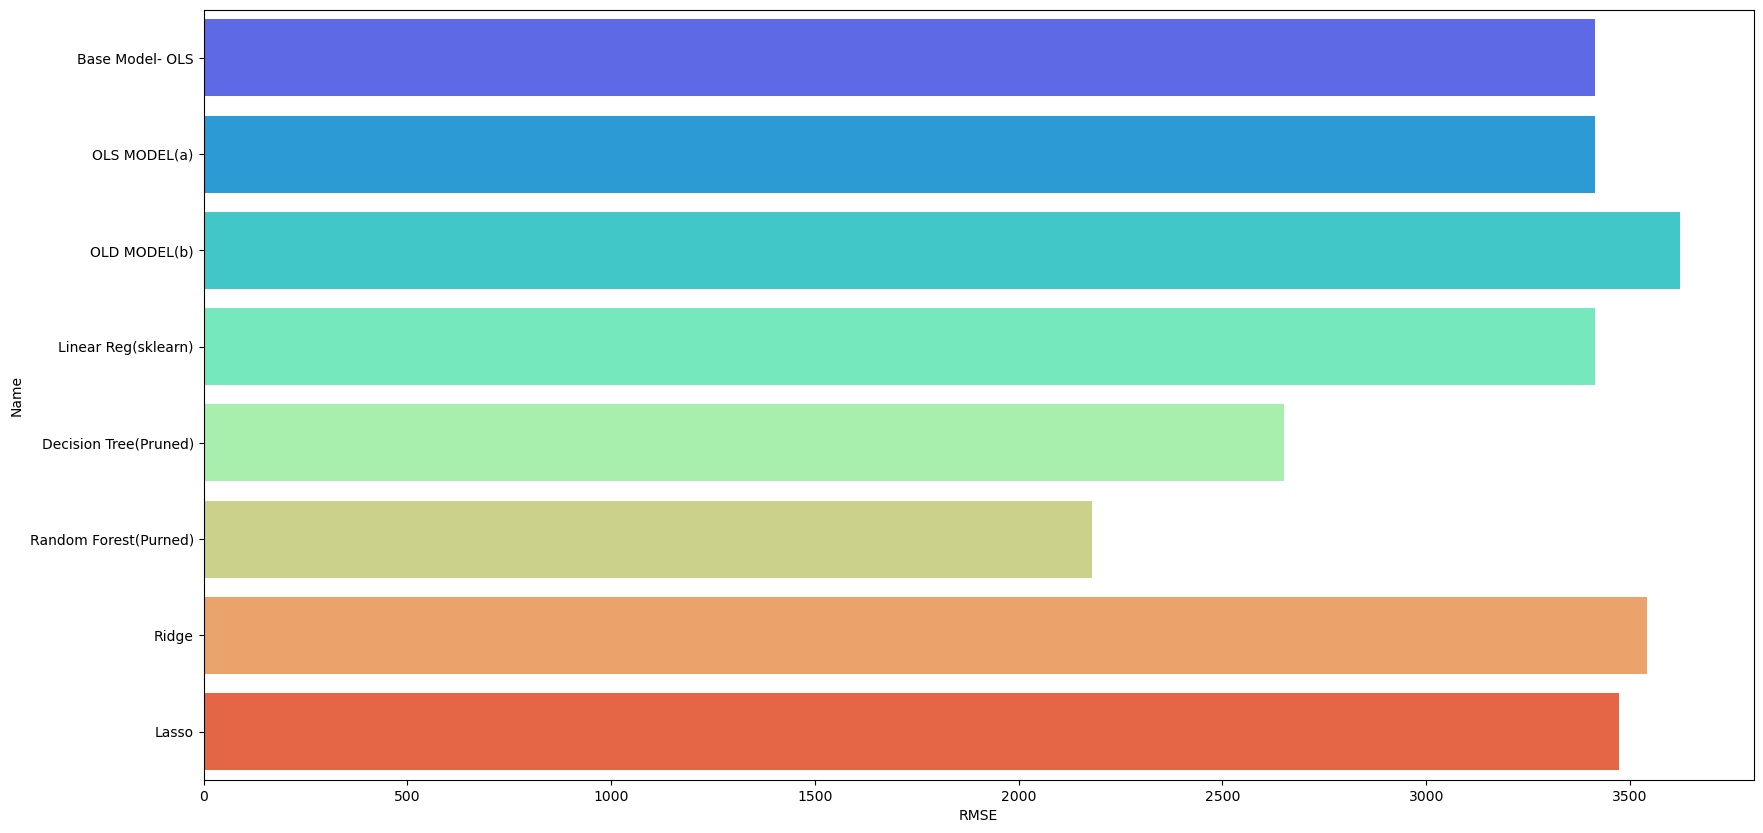

In [109]:
sns.barplot(x=summary['RMSE'],y =summary['Name'],palette='rainbow')
plt.show()